In [6]:
import numpy as np
import pyemma as pe
import pandas as pd
import itertools
import mdtraj as md
import matplotlib.pyplot as plt
from __future__ import print_function
import matplotlib
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import math
import seaborn as sns
%matplotlib inline
import matplotlib.image as mpimg

import sys
np.set_printoptions(threshold=sys.maxsize)
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.backends.backend_pdf import PdfPages

In [7]:
cutoff=0.45
allpairs = np.asarray(list(itertools.combinations(range(42), 2)))

In [8]:
def triu_inverse(x: np.ndarray, n: int) -> np.ndarray:
    """
    Converts flattened upper-triangular matrices into full symmetric matrices.
    
    Parameters
    ----------
    x
        Flattened matrices
    n
        Size of the n * n matrix
    
    Returns
    -------
    mat
        Array of shape (length, n, n)
    
    """
    length = x.shape[0]
    mat = np.zeros((length, n, n))
    a, b = np.triu_indices(n, k=1)
    mat[:, a, b] = x
    mat += mat.swapaxes(1, 2)
    return mat

In [9]:
###Generating Weights --EEF1 solvent
###(ab_G5_ad_weights previously generated weights file from plumed driver)
a_bias=np.genfromtxt("/pool/work/adelie/results_control/weights/ab_G5_ad_weights")
a_df=pd.DataFrame(a_bias[:,-1])
weight_a = np.array(a_df.apply(lambda x: math.exp(x/2.311420), axis=1))
o=np.linalg.norm(weight_a)
weight_a_n = weight_a/o

In [10]:
###Loading Data - --EEF1 solvent
xtc=('/pool/work/adelie/results_control/input_data/ab_G5_trajectory.xtc')
gro=('/pool/work/adelie/results_control/input_data/ab_G5.gro')

allpairs = np.asarray(list(itertools.combinations(range(42), 2)))
feat = pe.coordinates.featurizer(gro)
feat.add_residue_mindist(residue_pairs=allpairs)
inpcon = pe.coordinates.source(xtc, feat)
mindist = inpcon.get_output()
x=np.array(mindist)

In [34]:
### Caluculating Contact Matrix
con = (weight_a_n[:, None] * (x< cutoff)).sum(axis=0)
p=triu_inverse(con,42)
q=sum(p)
r=np.linalg.norm(q)
q = q/r

Text(33.0, 0.5, 'Residue number')

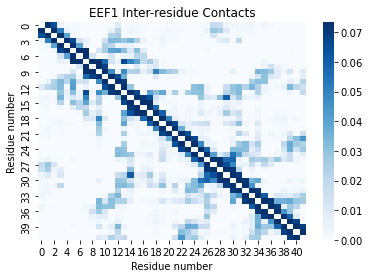

In [12]:
plt.title("EEF1 Inter-residue Contacts")
ax = sns.heatmap(q,cmap="Blues", cbar=True)
ax.set_xlabel("Residue number")
ax.set_ylabel("Residue number")


In [13]:
###Generating Weights --Explicit solvent
g_bias=np.genfromtxt("/pool/work/adelie/results_control/weights/ab_G5_ga_weights")
g_df=pd.DataFrame(g_bias)#[:,-1])
g_df=g_df.astype(float)
weight_g = np.array(g_df.apply(lambda x: math.exp(x/2.311420), axis=1))
og=np.linalg.norm(weight_g)
weight_g_n = weight_g/og

In [14]:
###Loading Data - --Explicit solvent
xtc_g=('/pool/work/adelie/gabis_data/G5_protein/traj_all-skip-0-noW_G5.xtc')
gro_g=('/pool/work/adelie/MAKING_WEIGHTS-G5/em.gro')

allpairs = np.asarray(list(itertools.combinations(range(42), 2)))
feat_g = pe.coordinates.featurizer(gro_g)
feat_g.add_residue_mindist(residue_pairs=allpairs)
inpcon_g = pe.coordinates.source(xtc_g, feat_g)
mindist_g = inpcon_g.get_output()
x_g=np.array(mindist_g)


getting output of FeatureReader:   0%|          | 0/4 [00:00<?, ?it/s]

In [15]:
con_g = (weight_g_n[:, None] * (x_g< cutoff)).sum(axis=0)
p_g=triu_inverse(con_g,42)
q_g=sum(p_g)
r=np.linalg.norm(q_g)
z = q_g/r

Text(33.0, 0.5, 'Residue number')

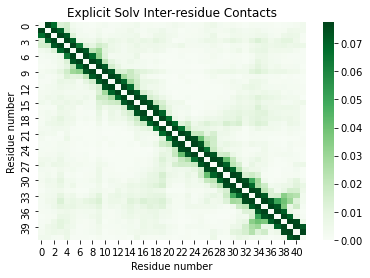

In [16]:
plt.title("Explicit Solv Inter-residue Contacts")

ax = sns.heatmap(z, cmap="Greens", cbar=True)

ax.set_xlabel("Residue number")
ax.set_ylabel("Residue number")